In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler


In [312]:
dispo_alimentaire = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
population = pd.read_csv('Population_2000_2018.csv')
indices_prod = pd.read_csv('FAOSTAT_indices de production.csv')
indicateurs_macro = pd.read_csv('FAOSTAT_Indicateurs macro.csv')
political_stability = pd.read_csv('PoliticalStability.csv')
securite_alimentaire = pd.read_csv('securite_alimentaire.csv')

# Clean Disponibilité Alimentaire

In [315]:
dispo_alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [317]:
dispo_alimentaire.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [319]:
dispo_alimentaire.drop(['Code Domaine', 'Code Élément', 'Code Produit', 'Domaine', 'Code année', 'Année', 'Symbole',
                         'Description du Symbole', 'Unité'], axis=1, inplace = True)


In [321]:
dispo_alimentaire.head()

,Code zone,Zone,Élément,Produit,Valeur
0,2,Afghanistan,Production,Blé et produits,4281.0
1,2,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,2,Afghanistan,Variation de stock,Blé et produits,-119.0
3,2,Afghanistan,Exportations - Quantité,Blé et produits,0.0
4,2,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0


In [323]:
dispo_alimentaire['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [325]:
dispo_alimentaire = dispo_alimentaire.loc[dispo_alimentaire['Produit']== 'Viande de Volailles', :]
dispo_alimentaire.head()

,Code zone,Zone,Élément,Produit,Valeur
651,2,Afghanistan,Production,Viande de Volailles,28.0
652,2,Afghanistan,Importations - Quantité,Viande de Volailles,29.0
653,2,Afghanistan,Variation de stock,Viande de Volailles,0.0
654,2,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.0
655,2,Afghanistan,Pertes,Viande de Volailles,2.0


In [327]:
dispo_alimentaire['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [329]:
dispo_suppr = (
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
        'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences', 'Variation de stock')
dispo_alimentaire = dispo_alimentaire[~dispo_alimentaire["Élément"].isin(dispo_suppr)]
dispo_alimentaire.head()

,Code zone,Zone,Élément,Produit,Valeur
651,2,Afghanistan,Production,Viande de Volailles,28.00
652,2,Afghanistan,Importations - Quantité,Viande de Volailles,29.00
658,2,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,1.53
659,2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,5.00
660,2,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,0.54


In [331]:
dispo_alimentaire = pd.pivot(dispo_alimentaire, index=['Zone', 'Code zone'], columns=['Élément'], values=['Valeur'])
dispo_alimentaire.columns = [col[1] for col in dispo_alimentaire.columns]
dispo_alimentaire = dispo_alimentaire.reset_index()
dispo_alimentaire = dispo_alimentaire.rename(columns={'Zone': 'Pays'})
dispo_alimentaire.head()

,Pays,Code zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,2,5.0,1.53,0.54,NaN,29.0,28.0
1,Afrique du Sud,202,143.0,35.69,14.11,63.0,514.0,1667.0
2,Albanie,3,85.0,16.36,6.26,0.0,38.0,13.0
3,Algérie,4,22.0,6.38,1.97,0.0,2.0,275.0
4,Allemagne,79,71.0,19.47,7.96,646.0,842.0,1514.0


In [333]:
dispo_alimentaire.isna().sum()

Pays                                                         0
Code zone                                                    0
Disponibilité alimentaire (Kcal/personne/jour)               0
Disponibilité alimentaire en quantité (kg/personne/an)       0
Disponibilité de protéines en quantité (g/personne/jour)     0
Exportations - Quantité                                     37
Importations - Quantité                                      2
Production                                                   4
dtype: int64

In [335]:
dispo_na = dispo_alimentaire[dispo_alimentaire.isna().any(axis=1)]
print(dispo_na)

                                      Pays  Code zone  \
0                              Afghanistan          2   
13                                 Bahamas         12   
14                              Bangladesh         16   
23                            Burkina Faso        233   
26                              Cabo Verde         35   
27                                Cambodge        115   
40                                    Cuba         49   
43                                Djibouti         72   
54                                  Gambie         75   
56                                 Grenade         86   
59                                  Guinée         90   
60                           Guinée-Bissau        175   
63                                   Haïti         93   
80                                Kiribati         83   
89                              Madagascar        129   
91                                  Malawi        130   
92                             

In [337]:
#Remplacement des Nan par 0 plutôt que supprimer les lignes
dispo_alimentaire = dispo_alimentaire.fillna(0)
dispo_alimentaire.head()


,Pays,Code zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,2,5.0,1.53,0.54,0.0,29.0,28.0
1,Afrique du Sud,202,143.0,35.69,14.11,63.0,514.0,1667.0
2,Albanie,3,85.0,16.36,6.26,0.0,38.0,13.0
3,Algérie,4,22.0,6.38,1.97,0.0,2.0,275.0
4,Allemagne,79,71.0,19.47,7.96,646.0,842.0,1514.0


# Clean population

In [340]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [342]:
population = population.loc[population['Année']== 2017 , :]
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [344]:
population.isna().sum()

Code Domaine                0
Domaine                     0
Code zone                   0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      235
dtype: int64

In [346]:
population.drop(['Code Domaine', 'Code Élément', 'Code Produit', 'Domaine', 'Code année', 'Année', 'Symbole',
                         'Description du Symbole', 'Unité', 'Note', 'Élément', 'Produit'], axis=1, inplace = True)
population['Valeur'] = population['Valeur']*1000
population = population.rename(columns={'Valeur':'Population', 'Zone':'Pays'})
population.head()

,Code zone,Pays,Population
17,2,Afghanistan,36296113.0
36,202,Afrique du Sud,57009756.0
55,3,Albanie,2884169.0
74,4,Algérie,41389189.0
93,79,Allemagne,82658409.0


# Clean indicateurs_macro

In [349]:
indicateurs_macro.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US$,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,19034.302820,X,Chiffre de source externe,NaN
1,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,4.444345,X,Chiffre de source externe,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US$,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,381136.716379,X,Chiffre de source externe,NaN
3,MK,Indicateurs macro,710,Afrique du Sud,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,17.791964,X,Chiffre de source externe,NaN
4,MK,Indicateurs macro,8,Albanie,6110,Valeur US$,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,13019.731318,X,Chiffre de source externe,NaN


In [351]:
indicateurs_macro['Élément'].unique()

array(['Valeur US$', 'Croissance annuelle US$'], dtype=object)

In [353]:
indicateurs_macro['Code zone (M49)'].value_counts()

Code zone (M49)
4      2
760    2
524    2
558    2
562    2
      ..
308    2
304    2
320    2
324    2
716    2
Name: count, Length: 210, dtype: int64

In [355]:
indicateurs_macro['Produit'].unique()

array(['Produit Intérieur Brut'], dtype=object)

In [357]:
indicateurs_macro = indicateurs_macro.loc[indicateurs_macro['Produit']== 'Produit Intérieur Brut' , :]
indicateurs_macro.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US$,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,19034.302820,X,Chiffre de source externe,NaN
1,MK,Indicateurs macro,4,Afghanistan,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,4.444345,X,Chiffre de source externe,NaN
2,MK,Indicateurs macro,710,Afrique du Sud,6110,Valeur US$,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,381136.716379,X,Chiffre de source externe,NaN
3,MK,Indicateurs macro,710,Afrique du Sud,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,17.791964,X,Chiffre de source externe,NaN
4,MK,Indicateurs macro,8,Albanie,6110,Valeur US$,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,13019.731318,X,Chiffre de source externe,NaN


In [359]:
indicateurs_macro.drop(['Code Domaine', 'Code Élément', 'Code Produit', 'Domaine', 'Code année', 'Année', 'Symbole',
                         'Description du Symbole', 'Unité', 'Note', 'Produit'], axis=1, inplace = True)
indicateurs_macro.head()

,Code zone (M49),Zone,Élément,Valeur
0,4,Afghanistan,Valeur US$,19034.302820
1,4,Afghanistan,Croissance annuelle US$,4.444345
2,710,Afrique du Sud,Valeur US$,381136.716379
3,710,Afrique du Sud,Croissance annuelle US$,17.791964
4,8,Albanie,Valeur US$,13019.731318


In [361]:
indicateurs_macro = pd.pivot(indicateurs_macro, index=['Zone', 'Code zone (M49)'], columns=['Élément'], values=['Valeur'])
indicateurs_macro.columns = [col[1] for col in indicateurs_macro.columns]
indicateurs_macro = indicateurs_macro.reset_index()
indicateurs_macro = indicateurs_macro.rename(columns={'Zone': 'Pays', 'Valeur US$':'PIB', 'Croissance annuelle US$':'Croissance annuelle %', 'Code zone (M49)':'Code zone'})
indicateurs_macro.head()

,Pays,Code zone,Croissance annuelle %,PIB
0,Afghanistan,4,4.444345,1.903430e+04
1,Afrique du Sud,710,17.791964,3.811367e+05
2,Albanie,8,9.767331,1.301973e+04
3,Algérie,12,6.287893,1.700970e+05
4,Allemagne,276,6.368624,3.763092e+06


In [363]:
indicateurs_macro.isna().sum()

Pays                     0
Code zone                0
Croissance annuelle %    0
PIB                      0
dtype: int64

# Clean indices_prod

In [366]:
indices_prod.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,QI,Indices de production,4,Afghanistan,434,Indice de Production Brut par Personne (Référe...,21170.02,"Viande de gibier, fraîche, réfrigérée ou congelée",2017,2017,NaN,94.60,E,Valeur estimée
1,QI,Indices de production,4,Afghanistan,434,Indice de Production Brut par Personne (Référe...,21111.01i,"Viande indigène, bovins, fraîche ou réfrigérée",2017,2017,NaN,108.38,E,Valeur estimée
2,QI,Indices de production,4,Afghanistan,434,Indice de Production Brut par Personne (Référe...,21117.01i,"Viande indigène, camélidés, fraîche ou réfrigérée",2017,2017,NaN,96.26,E,Valeur estimée
3,QI,Indices de production,4,Afghanistan,434,Indice de Production Brut par Personne (Référe...,21116i,"Viande indigène, caprin, fraîche ou réfrigérée",2017,2017,NaN,94.58,E,Valeur estimée
4,QI,Indices de production,4,Afghanistan,434,Indice de Production Brut par Personne (Référe...,21115i,"Viande indigène, ovine, fraîche ou réfrigérée",2017,2017,NaN,98.39,E,Valeur estimée


In [368]:
indices_prod['Produit'].unique()

array(['Viande de gibier, fraîche, réfrigérée ou congelée',
       'Viande indigène, bovins, fraîche ou réfrigérée',
       'Viande indigène, camélidés, fraîche ou réfrigérée',
       'Viande indigène, caprin, fraîche ou réfrigérée',
       'Viande indigène, ovine, fraîche ou réfrigérée',
       'Viande indigène, poulet, fraîche ou réfrigérée',
       'Viande indigène, canard, fraîche ou réfrigérée',
       'Viande indigène, cheval, fraîche ou réfrigérée',
       'Viande indigène, dinde, fraîche ou réfrigérée',
       'Viande indigène, oie, fraîche ou réfrigérée',
       'Viande indigène, suidés, fraîche ou réfrigérée', 'Viandes nda',
       'Viande indigène, léporidés, fraîche ou réfrigérée',
       'Viande indigène, pigeons et autres volatiles n.a.c., fraîche, réfrigérée ou congelée',
       'Viande indigène, buffle, fraîche ou réfrigérée',
       'Viande indigène, autres camélidés domestiques, fraîche ou réfrigérée',
       'Viande indigène, âne, fraîche ou réfrigérée',
       'Vian

In [370]:
indices_prod = indices_prod.loc[indices_prod['Produit'] == 'Viande indigène, poulet, fraîche ou réfrigérée', :]
indices_prod.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
5,QI,Indices de production,4,Afghanistan,434,Indice de Production Brut par Personne (Référe...,21121i,"Viande indigène, poulet, fraîche ou réfrigérée",2017,2017,NaN,68.65,E,Valeur estimée
14,QI,Indices de production,710,Afrique du Sud,434,Indice de Production Brut par Personne (Référe...,21121i,"Viande indigène, poulet, fraîche ou réfrigérée",2017,2017,NaN,95.23,E,Valeur estimée
20,QI,Indices de production,8,Albanie,434,Indice de Production Brut par Personne (Référe...,21121i,"Viande indigène, poulet, fraîche ou réfrigérée",2017,2017,NaN,157.21,E,Valeur estimée
30,QI,Indices de production,12,Algérie,434,Indice de Production Brut par Personne (Référe...,21121i,"Viande indigène, poulet, fraîche ou réfrigérée",2017,2017,NaN,108.73,E,Valeur estimée
40,QI,Indices de production,276,Allemagne,434,Indice de Production Brut par Personne (Référe...,21121i,"Viande indigène, poulet, fraîche ou réfrigérée",2017,2017,NaN,97.94,E,Valeur estimée


In [372]:
indices_prod.drop(['Code Domaine', 'Code Élément', 'Code Produit (CPC)', 'Domaine', 'Code année', 'Année', 'Symbole',
                         'Unité', 'Description du Symbole', 'Produit'], axis=1, inplace = True)
indices_prod.head()

,Code zone (M49),Zone,Élément,Valeur
5,4,Afghanistan,Indice de Production Brut par Personne (Référe...,68.65
14,710,Afrique du Sud,Indice de Production Brut par Personne (Référe...,95.23
20,8,Albanie,Indice de Production Brut par Personne (Référe...,157.21
30,12,Algérie,Indice de Production Brut par Personne (Référe...,108.73
40,276,Allemagne,Indice de Production Brut par Personne (Référe...,97.94


In [374]:
indices_prod = pd.pivot(indices_prod, index=['Zone', 'Code zone (M49)'], columns=['Élément'], values=['Valeur'])
indices_prod.columns = [col[1] for col in indices_prod.columns]
indices_prod = indices_prod.reset_index()
indices_prod = indices_prod.rename(columns={'Zone': 'Pays', 'Code zone (M49)':'Code zone'})
indices_prod.head()

,Pays,Code zone,Indice de Production Brut par Personne (Référence 2014-2016)
0,Afghanistan,4,68.65
1,Afrique du Sud,710,95.23
2,Albanie,8,157.21
3,Algérie,12,108.73
4,Allemagne,276,97.94


# Clean securite_alimentaire

In [377]:
securite_alimentaire.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6121,Valeur,210041,Prévalence de la sous-alimentation (%) (moyenn...,20162018,2016-2018,%,21.3,E,Valeur estimée,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6121,Valeur,210041,Prévalence de la sous-alimentation (%) (moyenn...,20162018,2016-2018,%,6.1,E,Valeur estimée,NaN
2,FS,Données de la sécurité alimentaire,8,Albanie,6121,Valeur,210041,Prévalence de la sous-alimentation (%) (moyenn...,20162018,2016-2018,%,4.3,E,Valeur estimée,NaN
3,FS,Données de la sécurité alimentaire,12,Algérie,6121,Valeur,210041,Prévalence de la sous-alimentation (%) (moyenn...,20162018,2016-2018,%,2.5,E,Valeur estimée,NaN
4,FS,Données de la sécurité alimentaire,276,Allemagne,6121,Valeur,210041,Prévalence de la sous-alimentation (%) (moyenn...,20162018,2016-2018,%,<2.5,E,Valeur estimée,NaN


In [379]:
securite_alimentaire.drop(['Code Domaine', 'Code Élément', 'Code Produit', 'Domaine', 'Code année', 'Année', 'Symbole',
                         'Unité', 'Description du Symbole', 'Note', 'Élément', 'Produit'], axis=1, inplace = True)
securite_alimentaire.head()

,Code zone (M49),Zone,Valeur
0,4,Afghanistan,21.3
1,710,Afrique du Sud,6.1
2,8,Albanie,4.3
3,12,Algérie,2.5
4,276,Allemagne,<2.5


In [381]:
securite_alimentaire = securite_alimentaire.rename(columns={'Valeur': 'Prévalence de la sous alimentation moyenne (%)', 'Zone':'Pays', 'Code zone (M49)':"Code zone"})
securite_alimentaire.head()

,Code zone,Pays,Prévalence de la sous alimentation moyenne (%)
0,4,Afghanistan,21.3
1,710,Afrique du Sud,6.1
2,8,Albanie,4.3
3,12,Algérie,2.5
4,276,Allemagne,<2.5


In [383]:
securite_alimentaire.isna().sum()

Code zone                                          0
Pays                                               0
Prévalence de la sous alimentation moyenne (%)    35
dtype: int64

In [385]:
securite_alimentaire_na = securite_alimentaire[securite_alimentaire.isna().any(axis=1)]
print(securite_alimentaire_na)

     Code zone                                   Pays  \
5           20                                Andorre   
7           28                     Antigua-et-Barbuda   
14          44                                Bahamas   
15          48                                Bahreïn   
22          60                               Bermudes   
23          64                                Bhoutan   
28          96                      Brunéi Darussalam   
31         108                                Burundi   
49         192                                   Cuba   
57         232                               Érythrée   
72         308                                Grenade   
73         304                              Groenland   
76         226                     Guinée équatoriale   
82         184                              Îles Cook   
83         584                          Îles Marshall   
94         392                                  Japon   
101        426                 

In [387]:
# Remplacement des NaN par 0, à re vérifier après la jointure : si ces pays manquent de données ils seront supprimés de l'analyse
securite_alimentaire = securite_alimentaire.fillna(0)

# Jointure

In [390]:
merged_1 = pd.merge(dispo_alimentaire, population, on='Code zone', how='left', indicator=True)
merged_1.head()

,Pays_x,Code zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Pays_y,Population,_merge
0,Afghanistan,2,5.0,1.53,0.54,0.0,29.0,28.0,Afghanistan,36296113.0,both
1,Afrique du Sud,202,143.0,35.69,14.11,63.0,514.0,1667.0,Afrique du Sud,57009756.0,both
2,Albanie,3,85.0,16.36,6.26,0.0,38.0,13.0,Albanie,2884169.0,both
3,Algérie,4,22.0,6.38,1.97,0.0,2.0,275.0,Algérie,41389189.0,both
4,Allemagne,79,71.0,19.47,7.96,646.0,842.0,1514.0,Allemagne,82658409.0,both


In [392]:
merged_1['_merge'].unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [394]:
merged_1.isna().sum()

Pays_x                                                      0
Code zone                                                   0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Exportations - Quantité                                     0
Importations - Quantité                                     0
Production                                                  0
Pays_y                                                      0
Population                                                  0
_merge                                                      0
dtype: int64

In [396]:
merged_1 = merged_1.drop(columns=['_merge', 'Pays_y'], axis=1)
merged_1 = merged_1.rename(columns={'Pays_x': 'Pays'})

In [398]:
merged_2 = pd.merge(indicateurs_macro, securite_alimentaire, on='Code zone', how='left', indicator=True)
merged_2.head()

,Pays_x,Code zone,Croissance annuelle %,PIB,Pays_y,Prévalence de la sous alimentation moyenne (%),_merge
0,Afghanistan,4,4.444345,1.903430e+04,Afghanistan,21.3,both
1,Afrique du Sud,710,17.791964,3.811367e+05,Afrique du Sud,6.1,both
2,Albanie,8,9.767331,1.301973e+04,Albanie,4.3,both
3,Algérie,12,6.287893,1.700970e+05,Algérie,2.5,both
4,Allemagne,276,6.368624,3.763092e+06,Allemagne,<2.5,both


In [400]:
merged_2['_merge'].unique()

['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [402]:
no_match = merged_2[merged_2['_merge'] != 'both']
print(f"Nombre de lignes sans correspondance : {len(no_match)}")
no_match_country = no_match['Pays_x'].unique().tolist()
print("Liste des pays manquants :")
print(no_match_country)

Nombre de lignes sans correspondance : 11
Liste des pays manquants :
['Anguilla', 'Aruba', 'Curaçao', 'Liechtenstein', 'Monaco', 'Montserrat', 'Saint-Marin', 'Sint Maarten (partie néerlandaise)', 'Îles Caïmanes', 'Îles Turques-et-Caïques', 'Îles Vierges britanniques']


In [404]:
# Ce sont des pays de faible population que l'on ne retrouve pas dans les mesures de la table securite_alimentaire, et qui auront peu 
# d'incidence pour l'analyse, on peut donc les supprimer :
merged_2 = merged_2[merged_2['_merge'] == 'both']
merged_2 = merged_2.drop(columns=['_merge', 'Pays_y'], axis=1)

In [406]:
# Jointure du 3e fichier
merged_2 = pd.merge(merged_2, indices_prod, on='Code zone', how='left', indicator=True)
merged_2.head()

,Pays_x,Code zone,Croissance annuelle %,PIB,Prévalence de la sous alimentation moyenne (%),Pays,Indice de Production Brut par Personne (Référence 2014-2016),_merge
0,Afghanistan,4,4.444345,1.903430e+04,21.3,Afghanistan,68.65,both
1,Afrique du Sud,710,17.791964,3.811367e+05,6.1,Afrique du Sud,95.23,both
2,Albanie,8,9.767331,1.301973e+04,4.3,Albanie,157.21,both
3,Algérie,12,6.287893,1.700970e+05,2.5,Algérie,108.73,both
4,Allemagne,276,6.368624,3.763092e+06,<2.5,Allemagne,97.94,both


In [408]:
merged_2['_merge'].unique()

['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [410]:
no_match = merged_2[merged_2['_merge'] != 'both']
print(f"Nombre de lignes sans correspondance : {len(no_match)}")
no_match_country = no_match['Pays_x'].unique().tolist()
print("Liste des pays manquants :")
print(no_match_country)

Nombre de lignes sans correspondance : 7
Liste des pays manquants :
['Andorre', 'Bermudes', 'Djibouti', 'Groenland', 'Maldives', 'Palaos', 'Îles Marshall']


In [412]:
# La ligne Chine est la somme des différents territoire de HK, Macao et Chine continentale, pour garder les spécificités de chaque territoire
# on retire la ligne Chine globale
# Supposons que votre DataFrame s'appelle 'df'
merged_2 = merged_2.drop(merged_2[merged_2['Pays'] == 'Chine'].index)


In [414]:
# Ce sont des pays de faible population que l'on ne retrouve pas dans les mesures de la table securite_alimentaire, et qui auront peu 
# d'incidence pour l'analyse, on peut donc les supprimer :
merged_2 = merged_2[merged_2['_merge'] == 'both']
merged_2 = merged_2.drop(columns=['_merge', 'Pays'], axis=1)
merged_2 = merged_2.rename(columns={'Pays_x': 'Pays'})

In [416]:
# Jointure des 2 merged
merged = pd.merge(merged_1, merged_2, on='Pays', how='outer', indicator=True)
merged.head()

,Pays,Code zone_x,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Exportations - Quantité,Importations - Quantité,Production,Population,Code zone_y,Croissance annuelle %,PIB,Prévalence de la sous alimentation moyenne (%),Indice de Production Brut par Personne (Référence 2014-2016),_merge
0,Afghanistan,2.0,5.0,1.53,0.54,0.0,29.0,28.0,36296113.0,4.0,4.444345,1.903430e+04,21.3,68.65,both
1,Afrique du Sud,202.0,143.0,35.69,14.11,63.0,514.0,1667.0,57009756.0,710.0,17.791964,3.811367e+05,6.1,95.23,both
2,Albanie,3.0,85.0,16.36,6.26,0.0,38.0,13.0,2884169.0,8.0,9.767331,1.301973e+04,4.3,157.21,both
3,Algérie,4.0,22.0,6.38,1.97,0.0,2.0,275.0,41389189.0,12.0,6.287893,1.700970e+05,2.5,108.73,both
4,Allemagne,79.0,71.0,19.47,7.96,646.0,842.0,1514.0,82658409.0,276.0,6.368624,3.763092e+06,<2.5,97.94,both


In [418]:
no_match = merged[merged['_merge'] != 'both']
print(no_match[['Pays', '_merge']])

                                 Pays      _merge
14                            Bahreïn  right_only
19                            Bhoutan  right_only
23                  Brunéi Darussalam  right_only
27                            Burundi  right_only
37          Chine, Taiwan Province de   left_only
41                            Comores  right_only
48                           Djibouti   left_only
65                 Guinée équatoriale  right_only
91                              Libye  right_only
99                           Maldives   left_only
106     Micronésie (États fédérés de)  right_only
112                             Nauru  right_only
124                         Palestine  right_only
126         Papouasie-Nouvelle-Guinée  right_only
128                          Pays-Bas   left_only
129            Pays-Bas (Royaume des)  right_only
133                        Porto Rico  right_only
136                             Qatar  right_only
140         République arabe syrienne  right_only


In [420]:
# Table de correspondance pour les pays importants pour l'analyse (population importante)
merged['Pays']= merged['Pays'].replace({'Pays-Bas':'Pays-Bas (Royaume des)', 'République démocratique du Congo':'Congo'})

print(merged.dtypes)

Pays                                                              object
Code zone_x                                                      float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Production                                                       float64
Population                                                       float64
Code zone_y                                                      float64
Croissance annuelle %                                            float64
PIB                                                              float64
Prévalence de la sous alimentation moyenne (%)                    object
Indice de Production Brut par Personne (Référence 2

In [422]:
# Conversion de la colonne de prévalence de sous alimentation en format numérique pour effectuer ensuite un group by Pays, 
# les prévalences <2.5 sont remplacées par 2 et pas 0 pour que cela reste significatif et au plus proche de la réalité
merged['Prévalence de la sous alimentation moyenne (%)'] = merged['Prévalence de la sous alimentation moyenne (%)'].replace('<2.5', '2.0')
merged['Prévalence de la sous alimentation moyenne (%)'] = pd.to_numeric(merged['Prévalence de la sous alimentation moyenne (%)'], errors='coerce')
merged = merged.drop(columns=['_merge'], axis=1)
merged = merged.drop(columns=["Exportations - Quantité", "Disponibilité alimentaire (Kcal/personne/jour)"])


In [424]:
merged = merged.groupby('Pays', as_index = False).sum()
merged.isna().sum()

Pays                                                            0
Code zone_x                                                     0
Disponibilité alimentaire en quantité (kg/personne/an)          0
Disponibilité de protéines en quantité (g/personne/jour)        0
Importations - Quantité                                         0
Production                                                      0
Population                                                      0
Code zone_y                                                     0
Croissance annuelle %                                           0
PIB                                                             0
Prévalence de la sous alimentation moyenne (%)                  0
Indice de Production Brut par Personne (Référence 2014-2016)    0
dtype: int64

In [426]:
merged.describe()

,Code zone_x,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Importations - Quantité,Production,Population,Code zone_y,Croissance annuelle %,PIB,Prévalence de la sous alimentation moyenne (%),Indice de Production Brut par Personne (Référence 2014-2016)
count,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,1.950000e+02,195.000000,195.000000
mean,111.702564,17.829231,6.281333,78.051282,624.779487,3.778862e+07,424.528205,7.706053,4.162604e+05,8.034872,106.568821
std,79.820183,16.262014,5.742773,176.792987,2334.413463,1.443705e+08,257.961004,7.227600,1.745517e+06,10.528293,38.338085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-27.928307,0.000000e+00,0.000000,0.000000
25%,40.500000,3.275000,1.115000,1.000000,3.000000,9.107790e+05,206.000000,5.146854,9.212908e+03,2.000000,97.650000
50%,109.000000,15.320000,5.530000,12.000000,48.000000,7.306322e+06,418.000000,7.560848,3.609855e+04,3.500000,104.060000
75%,175.500000,28.000000,9.660000,63.500000,240.500000,2.660160e+07,644.500000,10.160476,2.083575e+05,10.600000,111.190000
max,276.000000,72.310000,27.870000,1069.000000,21914.000000,1.421022e+09,894.000000,34.551485,1.961210e+07,62.900000,366.920000


In [428]:
# Il y a des valeurs à 0, on cherche à les isoler pour déterminer l'action à suivre
pib_zero = merged.loc[merged['PIB'] == 0]
print(pib_zero)


                          Pays  Code zone_x  \
37   Chine, Taiwan Province de        214.0   
48                    Djibouti         72.0   
99                    Maldives        132.0   
176                    Turquie        223.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
37                                               33.17        
48                                                2.68        
99                                               13.50        
176                                              20.64        

     Disponibilité de protéines en quantité (g/personne/jour)  \
37                                               11.01          
48                                                0.92          
99                                                4.70          
176                                               6.99          

     Importations - Quantité  Production  Population  Code zone_y  \
37                     161.0       652.0  23674546.0 

In [430]:
dispo_zero = merged.loc[merged['Disponibilité alimentaire en quantité (kg/personne/an)'] == 0]
print(dispo_zero)

                              Pays  Code zone_x  \
14                         Bahreïn          0.0   
19                         Bhoutan          0.0   
23               Brunéi Darussalam          0.0   
27                         Burundi          0.0   
41                         Comores          0.0   
65              Guinée équatoriale          0.0   
91                           Libye          0.0   
106  Micronésie (États fédérés de)          0.0   
112                          Nauru          0.0   
124                      Palestine          0.0   
126      Papouasie-Nouvelle-Guinée          0.0   
132                     Porto Rico          0.0   
135                          Qatar          0.0   
139      République arabe syrienne          0.0   
153                     Seychelles          0.0   
155                      Singapour          0.0   
158                        Somalie          0.0   
160                  Soudan du Sud          0.0   
172                          To

In [432]:
# Retrait des pays qui manquent de données
merged = merged.loc[(merged['Disponibilité alimentaire en quantité (kg/personne/an)'] != 0) & (merged['PIB'] != 0) 
                    & (merged['Prévalence de la sous alimentation moyenne (%)'] != 0)]
merged = merged.drop(columns=['Code zone_x', 'Code zone_y'], axis=1)
merged = merged.rename(columns={ 'Importations - Quantité':'Importations (Milliers de tonnes)', 'Production':'Production (Milliers de tonnes)'})
merged.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Importations (Milliers de tonnes),Production (Milliers de tonnes),Population,Croissance annuelle %,PIB,Prévalence de la sous alimentation moyenne (%),Indice de Production Brut par Personne (Référence 2014-2016)
count,158.000000,158.000000,158.000000,158.000000,1.580000e+02,158.000000,1.580000e+02,158.000000,158.000000
mean,19.504367,6.907785,85.537975,737.759494,4.484815e+07,7.894062,4.709720e+05,9.058228,110.201456
std,15.373508,5.487021,175.256414,2570.230710,1.592142e+08,7.051191,1.896366e+06,10.154295,36.936870
min,0.130000,0.040000,0.000000,0.000000,7.145800e+04,-27.928307,2.228757e+02,2.000000,0.010000
25%,5.892500,1.842500,3.000000,15.500000,3.372804e+06,5.616814,1.328574e+04,2.000000,98.397500
50%,17.325000,6.300000,16.000000,71.500000,9.875108e+06,7.729687,5.144811e+04,5.500000,105.325000
75%,28.782500,9.897500,81.250000,384.250000,3.135938e+07,10.311011,2.707352e+05,12.075000,112.595000
max,72.310000,27.870000,972.000000,21914.000000,1.421022e+09,25.722423,1.961210e+07,62.900000,366.920000


In [434]:
# Il reste des valeurs 0 pour l'importation, production et exportation : cela s'explique par le fait que les données se concentrent uniquement
# sur la volaille, un pays peut ne pas en produire/exporter/importer, il n'est pas necessaire de les supprimer.

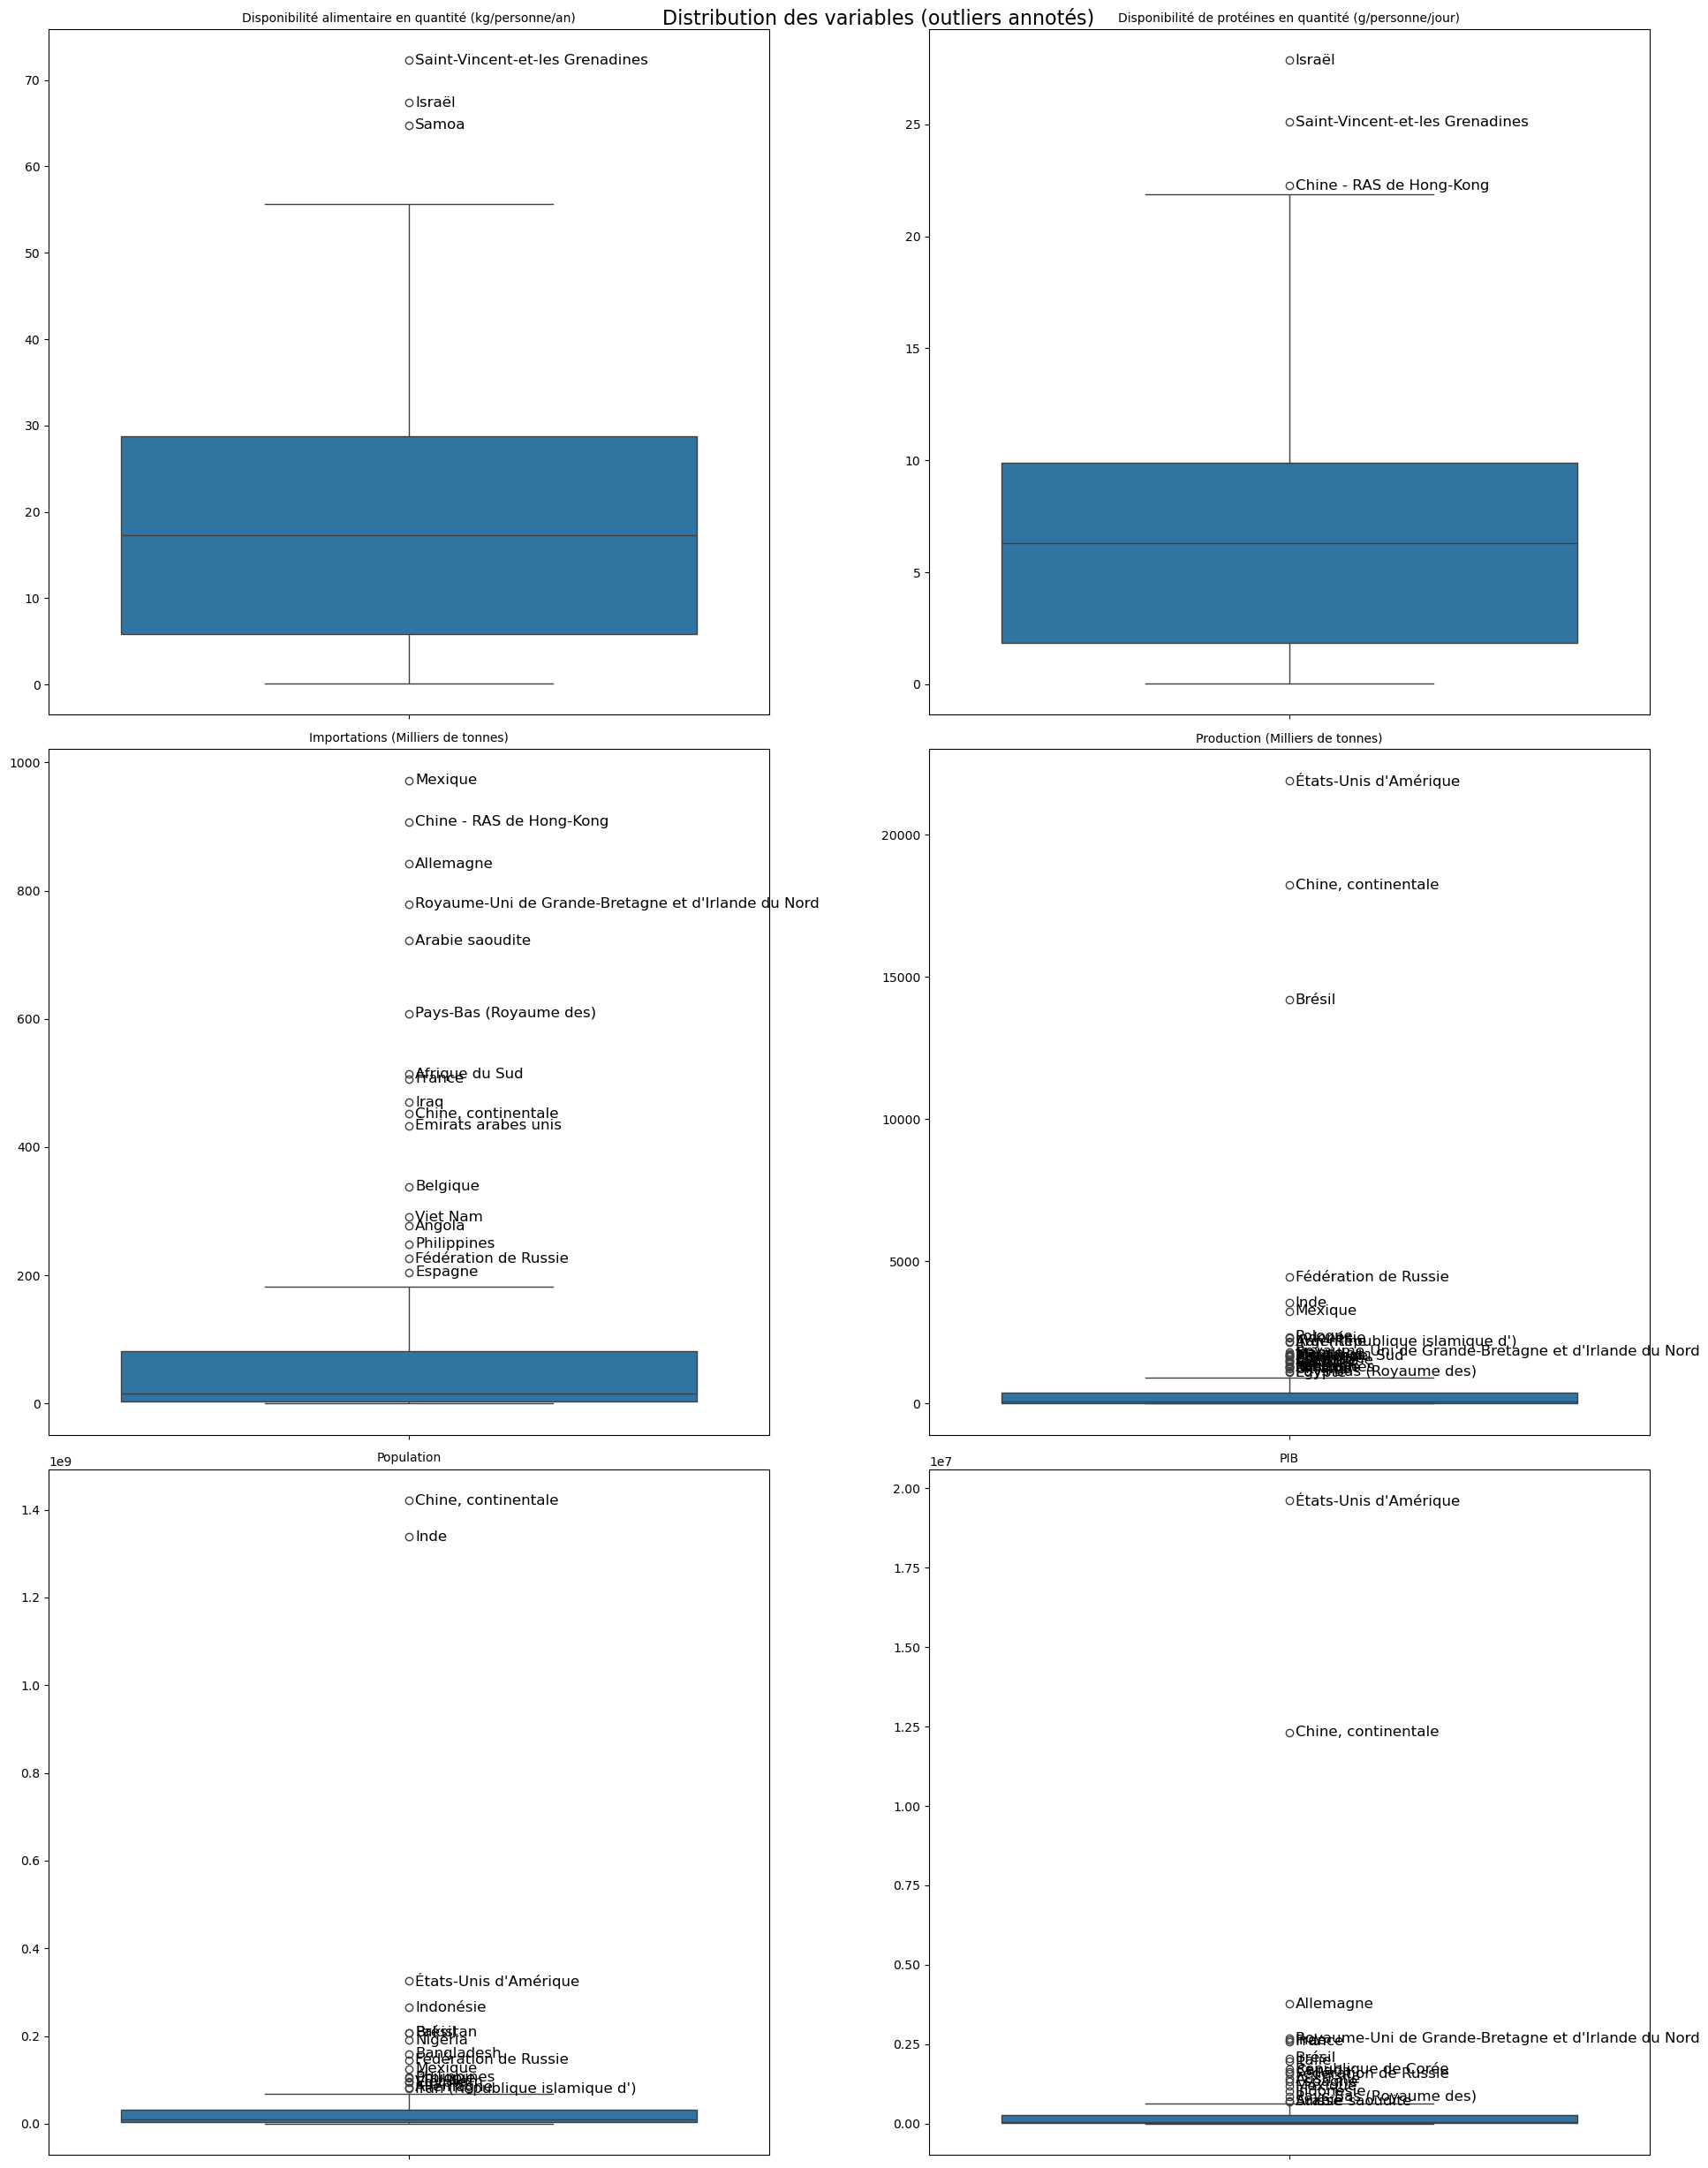

In [436]:


fig, axes = plt.subplots(3, 2, figsize=(20, 25))
fig.suptitle('Distribution des variables (outliers annotés)', fontsize=16)
axes = axes.flatten()

numeric_columns = [
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Disponibilité de protéines en quantité (g/personne/jour)',
    'Importations (Milliers de tonnes)',
    'Production (Milliers de tonnes)',
    'Population',
    'PIB'
]

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=merged[column], ax=axes[i], showfliers=True, orient='v')
    axes[i].set_title(column, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
    # Identifier les outliers
    Q1 = merged[column].quantile(0.25)
    Q3 = merged[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = merged[(merged[column] < (Q1 - 1.5 * IQR)) | (merged[column] > (Q3 + 1.5 * IQR))]
    
    # Annoter les outliers
    for idx, row in outliers.iterrows():
        axes[i].annotate(row['Pays'], (0, row[column]), xytext=(5, 0), 
                         textcoords='offset points', ha='left', va='center',
                         fontsize=12)

plt.tight_layout()
plt.show()


On retrouve logiquement les pays les plus riches et/ou peuplés en outliers pour la plupart des variables. Les cas d'Israël, Samoa et St Vincent les Grenadines s'expliquent d'une part par leurs développements agro alimentaire et leurs régimes alimentaires riches en protéines, où le poisson a une part importante. Dans tous les cas, l'ensemble de ces pays reste à considérer dans cette analyse pour le développement de notre activité à l'international.

# Ajout de 3 variables

In [440]:
merged['PIB'] = merged['PIB']*1000000
merged['PIB/habitant'] = merged['PIB']/merged['Population']
merged['Importations (Milliers de tonnes)'] = merged['Importations (Milliers de tonnes)']*1000000
merged['Importations (kg par personne'] = merged['Importations (Milliers de tonnes)']/merged['Population']



In [442]:
merged = merged.drop(columns=['Importations (Milliers de tonnes)', 'PIB'], axis=1)
merged.isna().sum()

Pays                                                            0
Disponibilité alimentaire en quantité (kg/personne/an)          0
Disponibilité de protéines en quantité (g/personne/jour)        0
Production (Milliers de tonnes)                                 0
Population                                                      0
Croissance annuelle %                                           0
Prévalence de la sous alimentation moyenne (%)                  0
Indice de Production Brut par Personne (Référence 2014-2016)    0
PIB/habitant                                                    0
Importations (kg par personne                                   0
dtype: int64

In [444]:

merged.to_csv('donnees_totales.csv', index=False)